In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
df=pd.read_csv("./Diwali Sales Data.csv",encoding='unicode_escape')
df.shape

(11251, 15)

In [40]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [42]:
dfMod=df
dfMod.drop(['Status','unnamed1'],axis=1,inplace=True)

In [43]:
pd.isnull(dfMod).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [44]:
dfMod.dropna(inplace=True)

In [45]:
df['Amount']=df['Amount'].astype('int')

In [46]:
df['Amount'].dtypes

dtype('int32')

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [48]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [49]:
dfMod.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

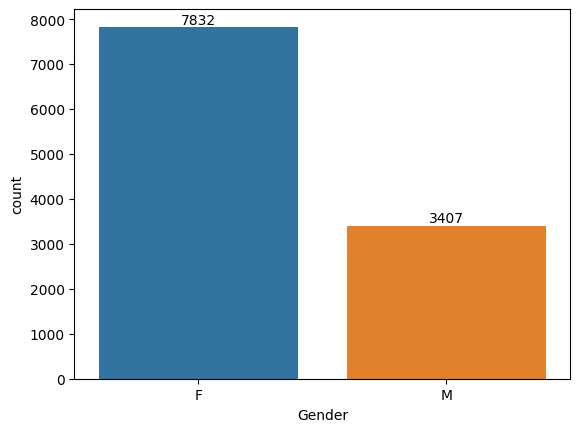

In [50]:
#This is a seaborn plot to see the number of customers are from which gender
gn=sns.countplot(x='Gender',data=dfMod)

for bars in gn.containers:
    gn.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

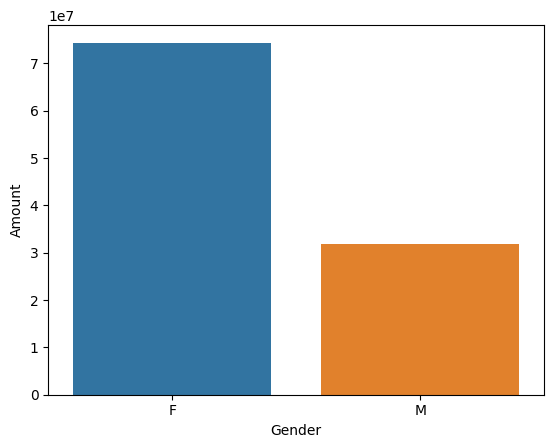

In [57]:
genToSale=dfMod.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=genToSale)

###Here from the last two graphs we can see that women are substantially higher up in the purchansing ladder.

In [58]:
dfMod.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

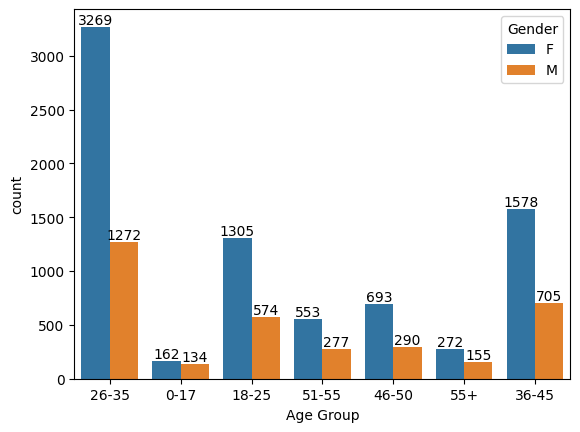

In [59]:
GToA=sns.countplot(data=dfMod, x='Age Group',hue='Gender')
for bars in GToA.containers:
    GToA.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

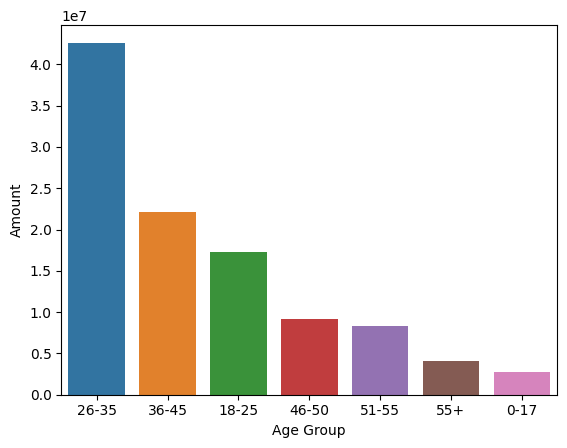

In [61]:
genToAmount=dfMod.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=genToAmount)

#The above graph shows us that the largest customer age group is that of ages from 25-36

<Axes: xlabel='State', ylabel='Orders'>

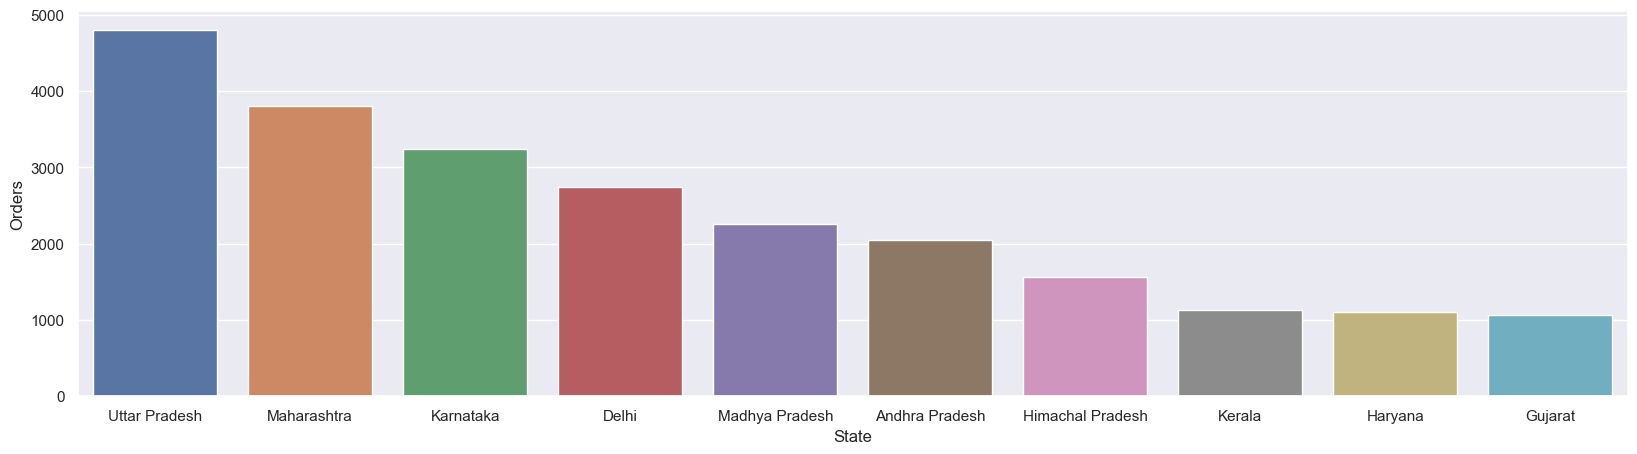

In [70]:
OrderspState=dfMod.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Orders',data=OrderspState)

<Axes: xlabel='State', ylabel='Amount'>

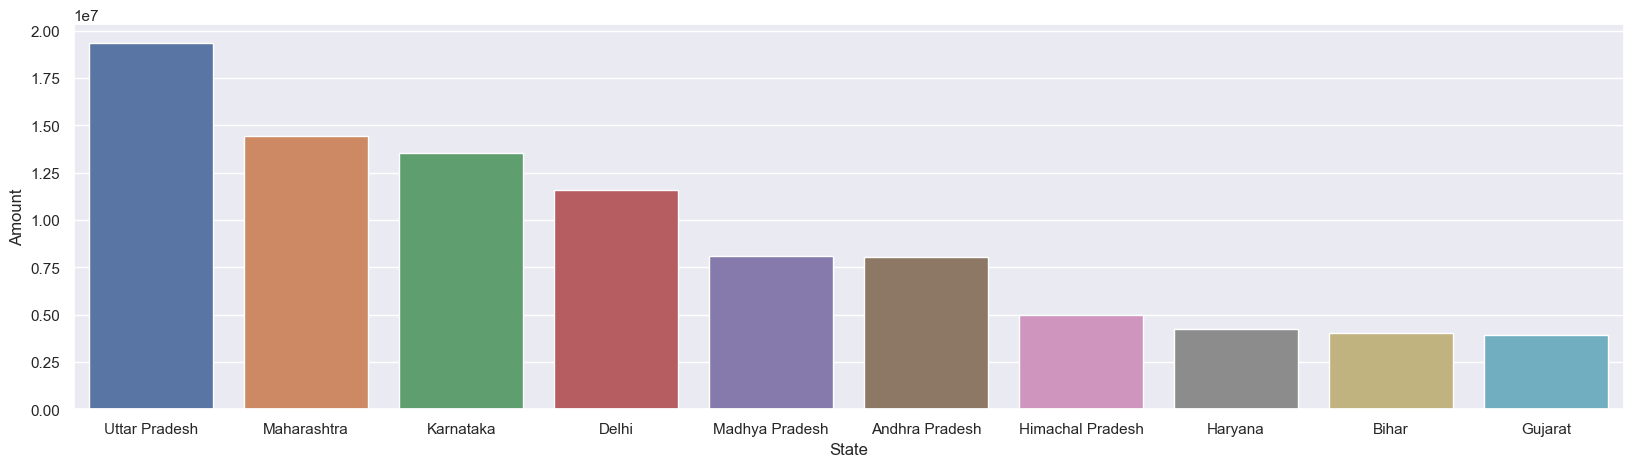

In [72]:
AmountpState=dfMod.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',data=AmountpState)

#From the above 2 graphs we can see that uttar pradesh is the state that has made maximum number of order as well as the maximum amount spent on the orders.

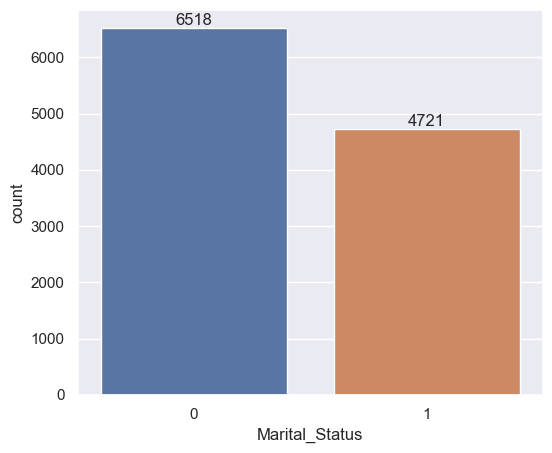

In [74]:
Ms=sns.countplot(x='Marital_Status',data=dfMod)
sns.set(rc={'figure.figsize':(6,5)})

for bars in Ms.containers:
    Ms.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

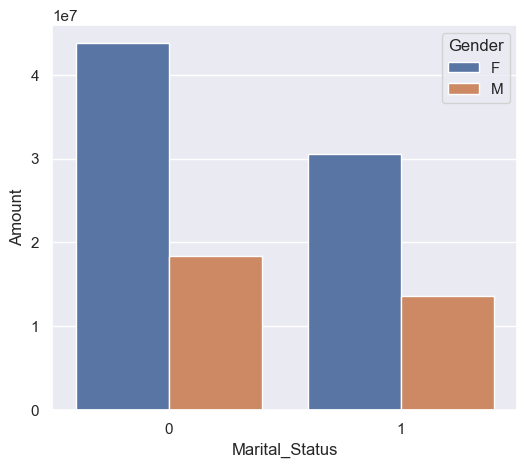

In [80]:
MsToG=dfMod.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=MsToG)

#Here we can see that married women are the top spenders.

<Axes: xlabel='Occupation', ylabel='Orders'>

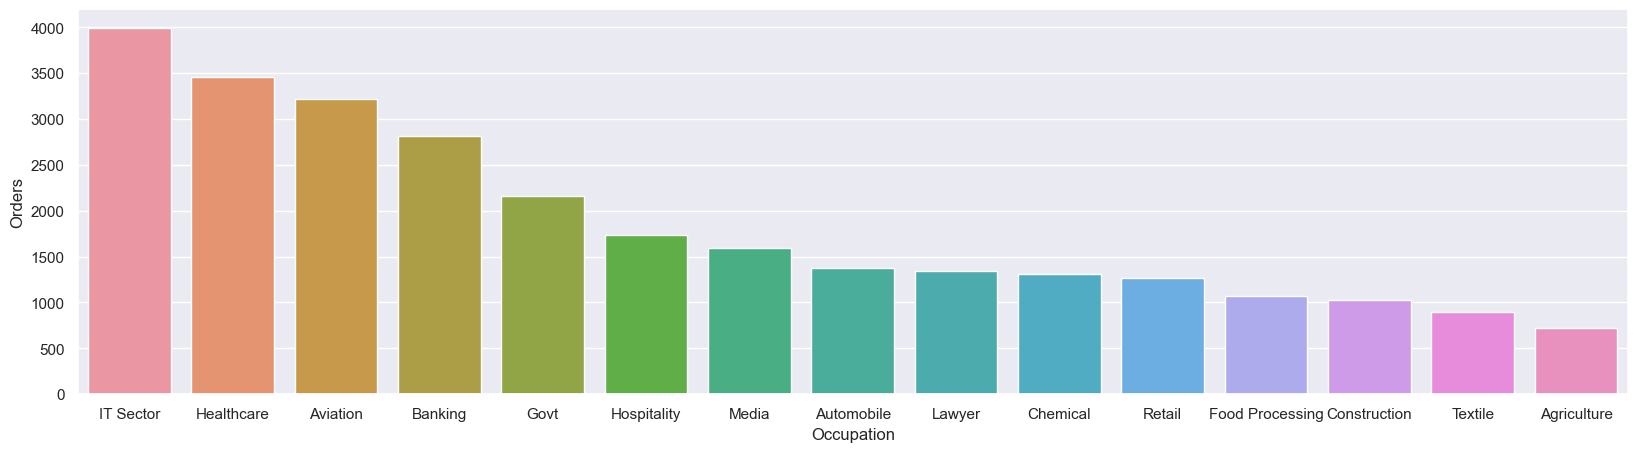

In [87]:
OccToOrder=dfMod.groupby('Occupation',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Orders',data=OccToOrder)

<Axes: xlabel='Occupation', ylabel='Amount'>

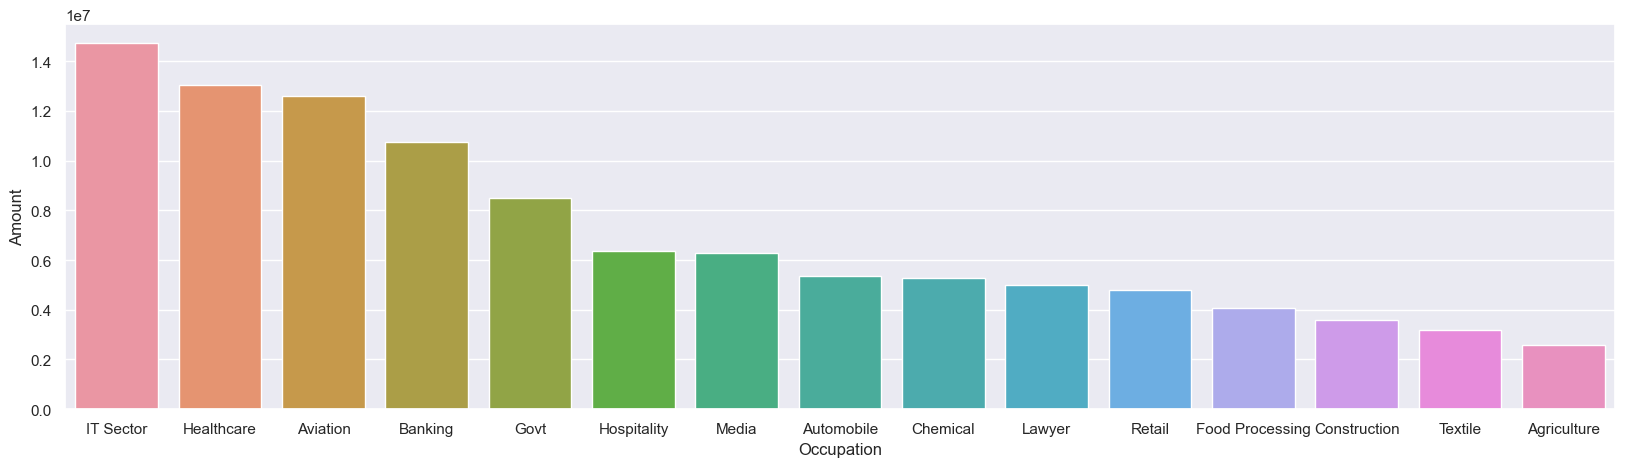

In [88]:
OccToAmount=dfMod.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=OccToAmount)

Heere we can see that most of the orders aswell as amount spent are by people from IT,Healthcare,Aviation and so on.

<Axes: xlabel='Product_Category', ylabel='Orders'>

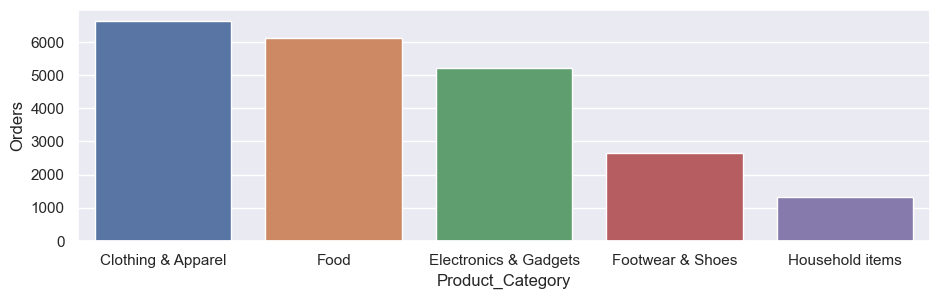

In [99]:
ProdToOrders=dfMod.groupby('Product_Category',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head()
sns.set(rc={'figure.figsize':(11,3)})
sns.barplot(x='Product_Category',y='Orders',data=ProdToOrders)

<Axes: xlabel='Product_Category', ylabel='Amount'>

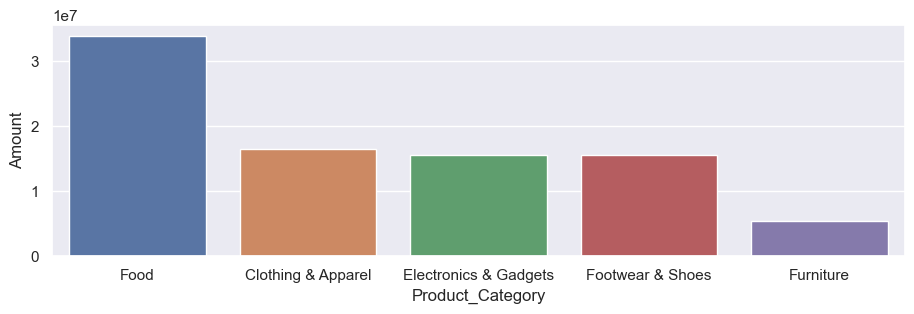

In [101]:
ProdToAmount=dfMod.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head()
sns.set(rc={'figure.figsize':(11,3)})
sns.barplot(x='Product_Category',y='Amount',data=ProdToAmount)

From the above we can see that the most ordered items are (clothing,food,electronics etc) where as most amount spend on are(Food,clothing and so on)

Here we can conclude that married women of age group:25-36 from Uttar Pradesh who work in the field of IT,Health and Aviation are the top most purchasers from the given data